# AoC 2021 day 13
## Part1
Seems that we are back to the old AoC tradition of having one problem with a set of points arranged into letter shapes.

First: read data into two lists: a list of points with `(x,y)` coordinates and a list of folds with name of the folded coordinate and the location of the fold.

In [6]:
def readdata(file):
    f = open(file,"rt")
    points = []
    line = f.readline().strip()
    while line != "":
        l = line.split(',')
        x = int(l[0])
        y = int(l[1])
        points.append((x,y))
        line = f.readline().strip()
    folds = []
    for line in f:
        l = line.split('=')
        folds.append((l[0][-1],int(l[1])))
    return points,folds

In [7]:
pt, ft = readdata("test.txt")

In [8]:
pt

[(6, 10),
 (0, 14),
 (9, 10),
 (0, 3),
 (10, 4),
 (4, 11),
 (6, 0),
 (6, 12),
 (4, 1),
 (0, 13),
 (10, 12),
 (3, 4),
 (3, 0),
 (8, 4),
 (1, 10),
 (2, 14),
 (8, 10),
 (9, 0)]

In [9]:
ft

[('y', 7), ('x', 5)]

Looks fine, so write two functions that do the folding, i.e. given a list of points and fold coordinate they fold the points in the list, one in `x`, one in `y`.

In [17]:
def foldx(points,fc):
    np = []
    for p in points:
        if p[0]>fc:
            p=((2*fc-p[0],p[1]))
        np.append(p)
    return np
def foldy(points,fc):
    np = []
    for p in points:
        if p[1]>fc:
            p = ((p[0],2*fc-p[1]))
        np.append(p)
    return np


In [18]:
foldy(pt,7)

[(6, 4),
 (0, 0),
 (9, 4),
 (0, 3),
 (10, 4),
 (4, 3),
 (6, 0),
 (6, 2),
 (4, 1),
 (0, 1),
 (10, 2),
 (3, 4),
 (3, 0),
 (8, 4),
 (1, 4),
 (2, 0),
 (8, 4),
 (9, 0)]

Manually do the first fold to check. Count unique points by changing list into a set. In principle we could work entirely on sets, not lists of points, but keep it as is.

In [20]:
ptt = foldy(pt,7)
len(set(ptt))

17

In [21]:
pc,fc = readdata("input.txt")
len(pc)

750

In [22]:
fc[0]

('x', 655)

So, do the first part.

In [23]:
pcc = foldx(pc,655)
len(set(pcc))

610

## Part 2
Foreseeable. AoC has a tradition of problems that, when solved, produce a set of points arranged to form letters.

Getting point coordinates is easy, just call the folding functions according to the input list. After each fold duplicates are removed – strictly speaking it is not necessary.

In [34]:
def part2(points,folds):
    pts = points.copy()
    for f in folds:
        if f[0] == 'x':
            pts = foldx(pts,f[1])
        else:
            pts = foldy(pts,f[1])
        pts = list(set(pts))  # Keep only unique points
    return pts

Now all that remains is to visualize the points and read the letters. A quick google to learn how to do scatter plots in Python, and we can try it for the test data.

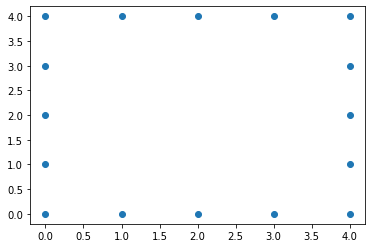

In [38]:
import matplotlib.pyplot as plt
pts = part2(pt,ft)
plt.plot([x[0] for x in pts],[y[1] for y in pts],'o')

OK, the competition data produce...

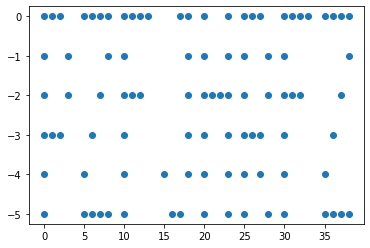

In [41]:
pts = part2(pc,fc)
plt.scatter([x[0] for x in pts],[-y[1] for y in pts])

OK, that is good enough to read the letters and get a gold star, but we certainly can do it nicer, just add some more Google...

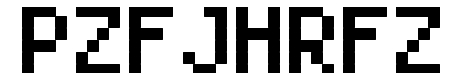

In [58]:
plt.figure(figsize=(8,1.2))
plt.axis('off')
plt.plot([x[0] for x in pts],[-y[1] for y in pts],'s',markersize=11, color='k')